# Long Document Summarization - Data Exploration

This notebook explores the datasets and analyzes document characteristics.

In [1]:
import json
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

# Add parent directory to path
sys.path.append('..')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Processed Data

In [19]:
def load_dataset(dataset_name, split='train'):
    """Load a processed dataset."""
    data_path = Path('../data/processed') / dataset_name / f'{split}.json'
    
    if not data_path.exists():
        print(f"Dataset {dataset_name} not found")
        return None
    
    with open(data_path, 'r') as f:
        data = json.load(f)
    
    return data

# Load datasets
datasets = ['arxiv', 'pubmed', 'multi_news', 'booksum', 'billsum']
loaded_data = {}

for dataset_name in datasets:
    data = load_dataset(dataset_name, 'train')
    if data:
        loaded_data[dataset_name] = data
        print(f"Loaded {dataset_name}: {len(data)} samples")

Loaded arxiv: 352 samples
Loaded pubmed: 116 samples
Dataset multi_news not found
Dataset booksum not found
Dataset billsum not found


## 2. Dataset Statistics

In [32]:
# Compute statistics for each dataset
stats = []

for dataset_name, data in loaded_data.items():
    token_counts = [sample.get('token_count', 0) for sample in data]
    num_paragraphs = [sample.get('num_paragraphs', 0) for sample in data]
    num_sentences = [sample.get('num_sentences', 0) for sample in data]
    
    stats.append({
        'Dataset': dataset_name,
        'Samples': len(data),
        'Avg Tokens': np.mean(token_counts),
        'Std Tokens': np.std(token_counts),
        'Min Tokens': np.min(token_counts),
        'Max Tokens': np.max(token_counts),
        'Avg Paragraphs': np.mean(num_paragraphs),
        'Avg Sentences': np.mean(num_sentences),
    })

stats_df = pd.DataFrame(stats)
stats_df

,Dataset,Samples,Avg Tokens,Std Tokens,Min Tokens,Max Tokens,Avg Paragraphs,Avg Sentences
0,arxiv,352,7956.553977,2427.350463,5003,14988,1.00000,334.335227
1,pubmed,116,6861.431034,1789.115117,5006,13542,1.12931,216.362069


## 3. Visualize Length Distributions

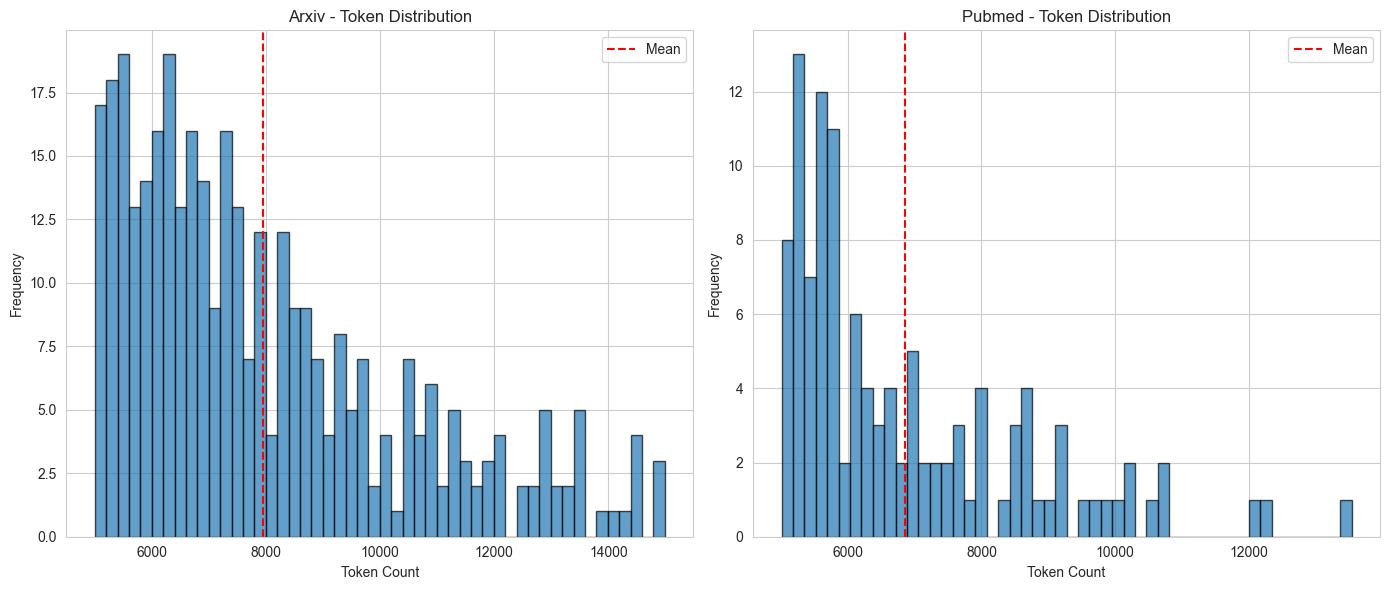

In [33]:
# Plot token count distributions with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

dataset_items = list(loaded_data.items())
for idx in range(2):
    if idx >= len(dataset_items):
        break
    dataset_name, data = dataset_items[idx]
    token_counts = [sample.get('token_count', 0) for sample in data]
    axes[idx].hist(token_counts, bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{dataset_name.title()} - Token Distribution')
    axes[idx].set_xlabel('Token Count')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(np.mean(token_counts), color='r', linestyle='--', label='Mean')
    axes[idx].legend()

plt.tight_layout()
plt.show()

## 4. Analyze Document Structure

In [34]:
# Analyze paragraphs per document
for dataset_name, data in loaded_data.items():
    num_paragraphs = [sample.get('num_paragraphs', 0) for sample in data]
    
    print(f"\n{dataset_name.upper()}:")
    print(f"  Average paragraphs: {np.mean(num_paragraphs):.1f}")
    print(f"  Median paragraphs: {np.median(num_paragraphs):.1f}")
    print(f"  Min-Max: {np.min(num_paragraphs)}-{np.max(num_paragraphs)}")


ARXIV:
  Average paragraphs: 1.0
  Median paragraphs: 1.0
  Min-Max: 1-1

PUBMED:
  Average paragraphs: 1.1
  Median paragraphs: 1.0
  Min-Max: 1-12


## 5. Sample Documents

In [36]:
# Show sample from each dataset
for dataset_name, data in loaded_data.items():
    if len(data) > 0:
        sample = data[0]
    
        print(f"Sample from {dataset_name.upper()}")

        print(f"Tokens: {sample.get('token_count', 0)}")
        print(f"Paragraphs: {sample.get('num_paragraphs', 0)}")
        print(f"Sentences: {sample.get('num_sentences', 0)}")
        
        # Print first paragraph
        if 'paragraphs' in sample and len(sample['paragraphs']) > 0:
            print(f"\nFirst paragraph:")
            print(sample['paragraphs'][0][:500] + '...')
        
        break  # Only show one dataset for brevity

Sample from ARXIV
Tokens: 5378
Paragraphs: 1
Sentences: 175

First paragraph:
the purpose of this paper is to study some aspects of the relative motion of free test particles in the gravitational field of a rotating astronomical source . 
 imagine , for the sake of concreteness , a free mass @xmath2 in orbit about the central source of mass @xmath3 and angular momentum @xmath4 , where @xmath2 , @xmath5 and @xmath4 are constants . 
 let @xmath6 be the proper time along the orbit of mass @xmath2 and @xmath7 be a local orthonormal tetrad system that is parallel transported a...
